In [356]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')
df2 = df1.iloc[:,1:]
df3 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
df1 = df3
df1.head()

date    open   close     low    high  volume    bb_bbm    bb_bbh  \
0   2/8/00  4.0714  4.1027  3.9755  4.1451       0  3.742555  4.258224   
1   2/9/00  4.0804  4.0224  4.0179  4.1786       0  3.778050  4.267487   
2  2/10/00  4.0224  4.0536  3.9130  4.0670       0  3.825040  4.222099   
3  2/11/00  4.0581  3.8840  3.8706  4.0759       0  3.846470  4.205897   
4  2/14/00  3.9018  4.1362  3.8840  4.1384       0  3.873925  4.233795   

     bb_bbl       atr      macd         cci       ema       roc     sma12  \
0  3.226886  0.258809  0.028209  108.782044  3.824942  3.199598  3.819608   
1  3.288613  0.251801  0.041007   99.551288  3.851270  6.000474  3.838583   
2  3.427981  0.244815  0.053055   72.677158  3.878247  1.115019  3.842308   
3  3.487043  0.241993  0.048361   40.605138  3.879014 -1.303585  3.838033   
4  3.514055  0.242879  0.064250   80.649750  3.913306  5.284325  3.855333   

      sma5  stochastic_oscillator       mtm6     mtm12  
0  3.85050              75.940406  10.722189  3.199598  
1  3.94916              80.342311  12.344989  6.000474  
2  4.02192              84.268815  14.862146  1.115019  
3  4.02728              62.924742   5.263158 -1.303585  
4  4.03978              94.663982   7.233226  5.284325

In [358]:
list(df1.columns)

['date',
 'open',
 'close',
 'low',
 'high',
 'volume',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'atr',
 'macd',
 'cci',
 'ema',
 'roc',
 'sma12',
 'sma5',
 'stochastic_oscillator',
 'mtm6',
 'mtm12']

In [359]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [360]:
df3 = df1[['open', 'high', 'low', 'close']]

In [361]:
a = df3.close.values

In [362]:
b = df3.values

In [363]:
try:
    df1 = df1.drop(['date'], axis=1)
except KeyError:
    pass
df1.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [364]:
#df2=df2.drop(df2.index[-1])
#df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [365]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [366]:
#df1 = df1.drop(['date'], axis=1)
close = df1['close']
#df1 = df1.drop(['close'], axis=1)
df1.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [367]:
g = df1.values
r = g.shape[0]
n_train = 7*r//10
n_val = 3*r//20
#n1_train = 9*r//10
#train_indices = random.sample(range(r), n_train)
#test_indices = [i for i in list(range(r)) if i not in train_indices]
#train_indices.sort()
#test_indices.sort()

In [368]:
df1.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [369]:
price_cols = ['open', 'high', 'low', 'close']
price_data = df1[price_cols]
data = df1
g = data.values
pre_X_train=g[:n_train,:]
pre_X_test=g[n_train:,:]
#exp_X_train = g[n_train:n1_train,:]
#exp_X_test = g[n1_train:,:]
#h = price.values
pre_X_train.shape

(3555, 18)

In [370]:
price_train = price_data[:n_train]
price_test = price_data[n_train:]

In [371]:
price_train.head()

open    high     low   close
0  4.0714  4.1451  3.9755  4.1027
1  4.0804  4.1786  4.0179  4.0224
2  4.0224  4.0670  3.9130  4.0536
3  4.0581  4.0759  3.8706  3.8840
4  3.9018  4.1384  3.8840  4.1362

In [372]:
#exp_y_train=h[train_indices]
#exp_y_test=h[test_indices]
print(pre_X_train.shape, pre_X_test.shape)
#print(price_train.shape, price_test.shape)

(3555, 18) (1524, 18)


In [373]:
price_test.shape

(1524, 4)

In [374]:
pre_X_train

array([[ 4.0714    ,  4.1027    ,  3.9755    , ..., 75.94040575,
        10.72218924,  3.19959754],
       [ 4.0804    ,  4.0224    ,  4.0179    , ..., 80.3423106 ,
        12.34498939,  6.00047435],
       [ 4.0224    ,  4.0536    ,  3.913     , ..., 84.2688145 ,
        14.86214616,  1.11501908],
       ...,
       [75.4129    , 74.8957    , 74.5586    , ...,  8.73316062,
        -2.51395666, -0.72531676],
       [75.09      , 74.7857    , 74.1221    , ..., 15.44512976,
        -2.16789264, -1.68650402],
       [74.9971    , 75.8214    , 74.6471    , ..., 39.55079716,
        -2.03232021, -1.51056774]])

In [375]:
coeffs= pywt.wavedec2(price_train, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')

In [376]:
print(d.shape)
print(pre_X_train.shape)

(3556, 4)
(3555, 18)


In [377]:
e = d[1:]
e.shape

(3555, 4)

In [378]:
pre_X_train[:,0] = e[:,0]
pre_X_train[:,1] = e[:,1]
pre_X_train[:,2] = e[:,2]
pre_X_train[:,3] = e[:,3]

In [379]:
from sklearn import preprocessing

In [380]:
#exp_X_train[:,1]

In [381]:
scaler= preprocessing.MinMaxScaler()
scaler.fit(pre_X_train)
exp_X_train=scaler.transform(pre_X_train)
exp_X_test=scaler.transform(pre_X_test)

In [382]:
#exp_X_train_drop = np.delete(exp_X_train, 3, axis=1)
#exp_X_test_drop = np.delete(exp_X_test, 3, axis=1)

In [383]:
price_train = d[:,1]
len(price_train)

3556

In [384]:
pd.DataFrame(exp_X_train).head()

0         1         2         3    4         5         6         7   \
0  0.031907  0.031907  0.031299  0.031299  0.0  0.028607  0.031484  0.032227   
1  0.031274  0.031274  0.030297  0.030297  0.0  0.028976  0.031575  0.032890   
2  0.031274  0.031274  0.030297  0.030297  0.0  0.029464  0.031129  0.034388   
3  0.031846  0.031846  0.031975  0.031975  0.0  0.029687  0.030969  0.035023   
4  0.031846  0.031846  0.031975  0.031975  0.0  0.029972  0.031244  0.035313   

         8         9         10        11        12        13        14  \
0  0.076543  0.503464  0.659667  0.029365  0.392360  0.029332  0.029255   
1  0.074210  0.504982  0.648609  0.029636  0.408868  0.029527  0.030250   
2  0.071884  0.506411  0.616412  0.029914  0.380075  0.029565  0.030984   
3  0.070944  0.505854  0.577988  0.029922  0.365820  0.029521  0.031038   
4  0.071239  0.507739  0.625964  0.030275  0.404647  0.029699  0.031164   

         15        16        17  
0  0.759404  0.469073  0.392360  
1  0.803423  0.480312  0.408868  
2  0.842688  0.497745  0.380075  
3  0.629247  0.431265  0.365820  
4  0.946640  0.444909  0.404647

In [385]:
pd.DataFrame(exp_X_test).head()

0         1         2         3    4         5         6         7   \
0  0.756004  0.740205  0.742190  0.759915  0.0  0.780950  0.758632  0.795419   
1  0.741412  0.737262  0.736709  0.745579  0.0  0.780591  0.759343  0.793899   
2  0.735969  0.739775  0.736262  0.744815  0.0  0.780242  0.759816  0.792662   
3  0.741139  0.734447  0.728215  0.744916  0.0  0.779248  0.760760  0.789572   
4  0.736213  0.732306  0.732131  0.742060  0.0  0.778098  0.761606  0.786268   

         8         9         10        11        12        13        14  \
0  0.375693  0.481607  0.418804  0.772136  0.347546  0.772985  0.749003   
1  0.369066  0.467831  0.359544  0.769857  0.352895  0.770683  0.745390   
2  0.362165  0.459771  0.376528  0.768226  0.355371  0.768660  0.744650   
3  0.374954  0.448901  0.361417  0.766084  0.351805  0.766240  0.743063   
4  0.370874  0.438954  0.382751  0.763935  0.353017  0.763968  0.738957   

         15        16        17  
0  0.104573  0.368336  0.347546  
1  0.083503  0.369978  0.352895  
2  0.147210  0.380781  0.355371  
3  0.205158  0.386519  0.351805  
4  0.158623  0.385554  0.353017

In [386]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [387]:
#autoencoder
input_dim = exp_X_train.shape[1]
hidden_dim = 8
activ = 'relu'

# Layer 1 - Input Layer, SAE_1
input_data = Input(shape=(input_dim,))
encoded = Dense(hidden_dim, activation=activ)(input_data)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 2 - SAE_2
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 3 - SAE_3
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 4 - SAE_4
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 5 - SAE_5
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation='relu')(encoded)

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

decoder_layer = autoencoder.layers[-1]
encoded_input = Input(shape=(hidden_dim,))
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 18)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 8)                 152       
_________________________________________________________________
dense_120 (Dense)            (None, 18)                162       
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 152       
_________________________________________________________________
dense_122 (Dense)            (None, 18)                162       
_________________________________________________________________
dense_123 (Dense)            (None, 8)                 152       
_________________________________________________________________
dense_124 (Dense)            (None, 18)                162

In [388]:
autoencoder.fit(exp_X_train, exp_X_train, epochs=2,verbose=2)

Epoch 1/2
 - 1s - loss: 0.0870
Epoch 2/2
 - 0s - loss: 0.0575


In [389]:
autoencoded_X_train = encoder.predict(exp_X_train)

In [390]:
autoencoded_X_test = encoder.predict(exp_X_test)

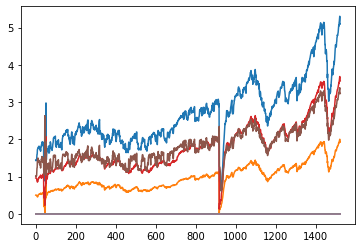

In [391]:
plt.plot(autoencoded_X_test)

In [392]:
autoencoded_X_train.shape, autoencoded_X_test.shape

((3555, 8), (1524, 8))

In [259]:
pd.DataFrame(autoencoded_X_train).head()

0         1         2    3    4         5         6         7
0  0.705936  0.170195  0.307121  0.0  0.0  0.008117  0.255543  0.564335
1  0.723013  0.173748  0.314915  0.0  0.0  0.013780  0.263199  0.577411
2  0.742241  0.177143  0.324056  0.0  0.0  0.020310  0.272499  0.591477
3  0.646844  0.161444  0.278135  0.0  0.0  0.000000  0.225933  0.521449
4  0.785743  0.191269  0.340675  0.0  0.0  0.032547  0.285159  0.631242

In [260]:
pd.DataFrame(autoencoded_X_test).head()

0         1    2         3    4         5    6         7
0  1.050991  1.009547  0.0  1.484352  0.0  0.714765  0.0  1.898482
1  1.023352  1.003778  0.0  1.475190  0.0  0.703534  0.0  1.878851
2  1.043349  1.006502  0.0  1.479548  0.0  0.710631  0.0  1.890864
3  1.050959  1.014148  0.0  1.492415  0.0  0.717842  0.0  1.905236
4  1.037513  0.999137  0.0  1.467112  0.0  0.704146  0.0  1.877670

In [261]:
decoded = decoder.predict(autoencoded_X_train)
pd.DataFrame(decoded).head()

0         1         2         3    4    5    6         7         8   \
0  0.088274  0.058889  0.148457  0.111341  0.0  0.0  0.0  0.083870  0.121340   
1  0.091629  0.062194  0.153420  0.114021  0.0  0.0  0.0  0.086655  0.127031   
2  0.095258  0.065938  0.158844  0.116602  0.0  0.0  0.0  0.090041  0.133136   
3  0.080496  0.052031  0.133740  0.107448  0.0  0.0  0.0  0.072258  0.107554   
4  0.105047  0.073628  0.172975  0.127443  0.0  0.0  0.0  0.094595  0.150441   

    9         10        11        12   13        14        15        16   17  
0  0.0  0.457627  0.116292  0.455034  0.0  0.099445  0.649816  0.458676  0.0  
1  0.0  0.463394  0.116524  0.462476  0.0  0.104421  0.667023  0.469905  0.0  
2  0.0  0.469215  0.116146  0.471169  0.0  0.110250  0.686949  0.482762  0.0  
3  0.0  0.436788  0.113440  0.423138  0.0  0.081996  0.592250  0.421589  0.0  
4  0.0  0.490464  0.123128  0.487220  0.0  0.120696  0.725548  0.509348  0.0

In [393]:
price_val = price_test.iloc[:n_val,:]
price_test = price_test.iloc[n_val:,:]

In [394]:
autoencoded_X_val = autoencoded_X_test[:n_val,:]
autoencoded_X_test = autoencoded_X_test[n_val:,:]
autoencoded_X_val.shape

(761, 8)

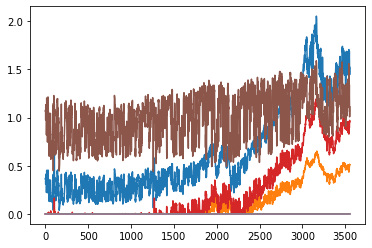

In [501]:
plt.plot(autoencoded_X_train)

In [396]:
autoencoded_X_test.shape

(763, 8)

In [347]:
import random

In [348]:
'''price_train = autoencoded_X_train[:,1]
exp_X_train = np.delete(exp_X_train, 1, axis=1)
exp_X_train.shape'''

'price_train = autoencoded_X_train[:,1]\nexp_X_train = np.delete(exp_X_train, 1, axis=1)\nexp_X_train.shape'

In [397]:
X_train= autoencoded_X_train.reshape((autoencoded_X_train.shape[0],1,autoencoded_X_train.shape[1]))
#X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=price_train[1:]
#y_test=exp_y_test
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(3555, 1, 8) (3555,)


In [398]:
X_val= autoencoded_X_val.reshape((autoencoded_X_val.shape[0],1,autoencoded_X_val.shape[1]))
#X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_val = price_val.iloc[:,3]

In [399]:
y_val.shape

(761,)

In [400]:
y_test = price_test.iloc[:,3]
y_test.shape
#y_val = price_val.iloc[:,3]

(763,)

In [401]:
autoencoded_X_test.shape

(763, 8)

In [402]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [481]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=100, verbose=1)
opt = Adam(learning_rate=0.0001)

In [483]:
neurons=60
dropout=0.3
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dense(units=1))
model1.add(Activation('relu'))
model1.compile(loss='mse', optimizer=opt)
model1.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_177 (LSTM)              (None, 1, 60)             16560     
_________________________________________________________________
dropout_133 (Dropout)        (None, 1, 60)             0         
_________________________________________________________________
lstm_178 (LSTM)              (None, 1, 120)            86880     
_________________________________________________________________
dropout_134 (Dropout)        (None, 1, 120)            0         
_________________________________________________________________
lstm_179 (LSTM)              (None, 1, 240)            346560    
_________________________________________________________________
dropout_135 (Dropout)        (None, 1, 240)            0         
_________________________________________________________________
lstm_180 (LSTM)              (None, 60)              

In [492]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False, batch_size=64, verbose=1, validation_data = (X_val, y_val), callbacks=[es])
model1.save('./models/attempt11.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

Train on 3555 samples, validate on 761 samples
Epoch 1/5000
3555/3555 [==============================] - 1s 277us/step - loss: 30.0571 - val_loss: 122.1072
Epoch 2/5000
3555/3555 [==============================] - 1s 255us/step - loss: 30.6220 - val_loss: 111.1800
Epoch 3/5000
3555/3555 [==============================] - 1s 252us/step - loss: 28.6040 - val_loss: 119.1329
Epoch 4/5000
3555/3555 [==============================] - 1s 254us/step - loss: 29.1238 - val_loss: 110.7540
Epoch 5/5000
3555/3555 [==============================] - 1s 278us/step - loss: 28.8457 - val_loss: 128.0214
Epoch 6/5000
3555/3555 [==============================] - 1s 265us/step - loss: 28.6268 - val_loss: 110.3023
Epoch 7/5000
3555/3555 [==============================] - 1s 259us/step - loss: 27.5169 - val_loss: 122.2176
Epoch 8/5000
3555/3555 [==============================] - 1s 269us/step - loss: 29.8056 - val_loss: 106.1529
Epoch 9/5000
3555/3555 [==============================] - 1s 258us/step - loss: 2

3555/3555 [==============================] - 1s 221us/step - loss: 26.4570 - val_loss: 108.7344
Epoch 76/5000
3555/3555 [==============================] - 1s 256us/step - loss: 25.8779 - val_loss: 104.4411
Epoch 77/5000
3555/3555 [==============================] - 1s 232us/step - loss: 27.9761 - val_loss: 107.8248
Epoch 78/5000
3555/3555 [==============================] - 1s 249us/step - loss: 26.8358 - val_loss: 110.8947
Epoch 79/5000
3555/3555 [==============================] - 1s 261us/step - loss: 28.0469 - val_loss: 101.3812
Epoch 80/5000
3555/3555 [==============================] - 1s 303us/step - loss: 26.8286 - val_loss: 125.6142
Epoch 81/5000
3555/3555 [==============================] - 1s 318us/step - loss: 25.5803 - val_loss: 108.7497
Epoch 82/5000
3555/3555 [==============================] - 1s 309us/step - loss: 26.5527 - val_loss: 102.4277
Epoch 83/5000
3555/3555 [==============================] - 1s 294us/step - loss: 25.9130 - val_loss: 113.0713
Epoch 84/5000
3555/3555 

3555/3555 [==============================] - 1s 254us/step - loss: 24.7361 - val_loss: 110.0081
Epoch 150/5000
3555/3555 [==============================] - 1s 322us/step - loss: 25.6417 - val_loss: 94.5679
Epoch 151/5000
3555/3555 [==============================] - 1s 291us/step - loss: 24.9730 - val_loss: 103.6930
Epoch 152/5000
3555/3555 [==============================] - 1s 320us/step - loss: 24.3491 - val_loss: 92.9881
Epoch 153/5000
3555/3555 [==============================] - 1s 298us/step - loss: 26.4649 - val_loss: 112.3860
Epoch 154/5000
3555/3555 [==============================] - 1s 289us/step - loss: 25.1554 - val_loss: 95.2684
Epoch 155/5000
3555/3555 [==============================] - 1s 287us/step - loss: 24.6493 - val_loss: 106.9093
Epoch 156/5000
3555/3555 [==============================] - 1s 267us/step - loss: 24.0917 - val_loss: 98.9526
Epoch 157/5000
3555/3555 [==============================] - 1s 283us/step - loss: 24.4629 - val_loss: 100.1187
Epoch 158/5000
3555/

3555/3555 [==============================] - 1s 213us/step - loss: 24.3374 - val_loss: 102.1719
Epoch 224/5000
3555/3555 [==============================] - 1s 215us/step - loss: 24.0690 - val_loss: 92.6023
Epoch 225/5000
3555/3555 [==============================] - 1s 214us/step - loss: 24.3215 - val_loss: 92.3608
Epoch 226/5000
3555/3555 [==============================] - 1s 226us/step - loss: 25.0868 - val_loss: 104.8598
Epoch 227/5000
3555/3555 [==============================] - 1s 287us/step - loss: 23.9340 - val_loss: 88.2327
Epoch 228/5000
3555/3555 [==============================] - 1s 228us/step - loss: 24.6282 - val_loss: 106.7550
Epoch 229/5000
3555/3555 [==============================] - 1s 215us/step - loss: 23.8756 - val_loss: 94.9993
Epoch 230/5000
3555/3555 [==============================] - 1s 207us/step - loss: 22.7295 - val_loss: 94.0018
Epoch 231/5000
3555/3555 [==============================] - 1s 231us/step - loss: 24.1474 - val_loss: 88.6288
Epoch 232/5000
3555/35

3555/3555 [==============================] - 1s 268us/step - loss: 22.6579 - val_loss: 115.9052
Epoch 298/5000
3555/3555 [==============================] - 1s 303us/step - loss: 22.2064 - val_loss: 88.6377
Epoch 299/5000
3555/3555 [==============================] - 1s 228us/step - loss: 23.3728 - val_loss: 130.2157
Epoch 300/5000
3555/3555 [==============================] - 1s 221us/step - loss: 22.3059 - val_loss: 87.0931
Epoch 301/5000
3555/3555 [==============================] - 1s 217us/step - loss: 23.3289 - val_loss: 92.1305
Epoch 302/5000
3555/3555 [==============================] - 1s 234us/step - loss: 22.4522 - val_loss: 90.3977
Epoch 303/5000
3555/3555 [==============================] - 1s 219us/step - loss: 23.1100 - val_loss: 95.6377
Epoch 304/5000
3555/3555 [==============================] - 1s 224us/step - loss: 22.0086 - val_loss: 106.7831
Epoch 305/5000
3555/3555 [==============================] - 1s 209us/step - loss: 23.2063 - val_loss: 100.9521
Epoch 306/5000
3555/3

3555/3555 [==============================] - 1s 216us/step - loss: 22.8052 - val_loss: 82.2149
Epoch 372/5000
3555/3555 [==============================] - 1s 254us/step - loss: 23.0211 - val_loss: 101.7346
Epoch 373/5000
3555/3555 [==============================] - 1s 301us/step - loss: 21.1360 - val_loss: 92.3050
Epoch 374/5000
3555/3555 [==============================] - 1s 265us/step - loss: 21.9862 - val_loss: 138.3587
Epoch 375/5000
3555/3555 [==============================] - 1s 337us/step - loss: 21.0699 - val_loss: 91.7774
Epoch 376/5000
3555/3555 [==============================] - 1s 308us/step - loss: 21.6715 - val_loss: 100.6667
Epoch 377/5000
3555/3555 [==============================] - 1s 256us/step - loss: 21.5075 - val_loss: 103.6854
Epoch 378/5000
3555/3555 [==============================] - 1s 303us/step - loss: 22.0597 - val_loss: 102.0596
Epoch 379/5000
3555/3555 [==============================] - 1s 254us/step - loss: 21.6342 - val_loss: 95.2580
Epoch 380/5000
3555/

3555/3555 [==============================] - 1s 240us/step - loss: 20.4441 - val_loss: 90.2968
Epoch 446/5000
3555/3555 [==============================] - 1s 229us/step - loss: 21.7438 - val_loss: 89.3766
Epoch 447/5000
3555/3555 [==============================] - 1s 254us/step - loss: 20.6340 - val_loss: 120.3072
Epoch 448/5000
3555/3555 [==============================] - 1s 249us/step - loss: 20.6382 - val_loss: 116.1839
Epoch 449/5000
3555/3555 [==============================] - 1s 251us/step - loss: 20.3751 - val_loss: 86.1392
Epoch 450/5000
3555/3555 [==============================] - 1s 244us/step - loss: 20.5655 - val_loss: 113.6711
Epoch 451/5000
3555/3555 [==============================] - 1s 311us/step - loss: 21.4562 - val_loss: 94.5328
Epoch 452/5000
3555/3555 [==============================] - 1s 250us/step - loss: 20.3523 - val_loss: 96.4932
Epoch 453/5000
3555/3555 [==============================] - 1s 345us/step - loss: 21.3351 - val_loss: 112.0605
Epoch 454/5000
3555/3

3555/3555 [==============================] - 1s 295us/step - loss: 20.4687 - val_loss: 106.7593
Epoch 520/5000
3555/3555 [==============================] - 1s 326us/step - loss: 20.6305 - val_loss: 101.9326
Epoch 521/5000
3555/3555 [==============================] - 1s 235us/step - loss: 19.3832 - val_loss: 90.7014
Epoch 522/5000
3555/3555 [==============================] - 1s 209us/step - loss: 20.5892 - val_loss: 102.1718
Epoch 523/5000
3555/3555 [==============================] - 1s 224us/step - loss: 20.5421 - val_loss: 107.8636
Epoch 524/5000
3555/3555 [==============================] - 1s 210us/step - loss: 20.0279 - val_loss: 107.8987
Epoch 525/5000
3555/3555 [==============================] - 1s 214us/step - loss: 20.2952 - val_loss: 93.2689
Epoch 526/5000
3555/3555 [==============================] - 1s 274us/step - loss: 20.2900 - val_loss: 112.5382
Epoch 527/5000
3555/3555 [==============================] - 1s 212us/step - loss: 19.3356 - val_loss: 94.4083
Epoch 528/5000
3555

KeyboardInterrupt: 

In [ ]:
'''coeffs= pywt.wavedec2(price_test, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
exp_X_test[:,0] = d[:-1,0]
exp_X_test[:,1] = d[:-1,1]
exp_X_test[:,2] = d[:1,2]
exp_X_test[:,3] = d[:-1,3]'''

In [191]:
#expXtest = exp_X_test[:,1:]

In [493]:
pd.DataFrame(autoencoded_X_train).head()

0    1    2    3    4         5    6    7
0  0.364605  0.0  0.0  0.0  0.0  1.066508  0.0  0.0
1  0.373960  0.0  0.0  0.0  0.0  1.080561  0.0  0.0
2  0.362545  0.0  0.0  0.0  0.0  1.066226  0.0  0.0
3  0.307048  0.0  0.0  0.0  0.0  0.976932  0.0  0.0
4  0.370233  0.0  0.0  0.0  0.0  1.077817  0.0  0.0

In [234]:
#exp_X_test=encoder.predict(scaler.transform(exp_X_test))
#exp_X_test=scaler.fit_transform(exp_X_test)
#scaled_df1=pd.DataFrame(exp_X_test)
#scaled_df1.head()

0         1    2         3         4         5         6         7    8
0  0.0  0.136990  0.0  0.202118  0.683817  0.493805  0.028984  0.139598  0.0
1  0.0  0.136976  0.0  0.202058  0.683991  0.494094  0.029204  0.139693  0.0
2  0.0  0.137027  0.0  0.202180  0.683770  0.493683  0.028912  0.139555  0.0
3  0.0  0.136968  0.0  0.202045  0.683689  0.493725  0.028966  0.139544  0.0
4  0.0  0.136922  0.0  0.201919  0.683756  0.493938  0.029127  0.139606  0.0

In [494]:
#y_test = exp_X_test[:,1]
#exp_X_test = np.delete(exp_X_test, 1, axis=1)
X_test=autoencoded_X_test.reshape((autoencoded_X_test.shape[0],1,autoencoded_X_test.shape[1]))

In [495]:
y_test = price_test.iloc[:,1]

In [496]:
pred=model1.predict(X_test)
actual= np.array(y_test)

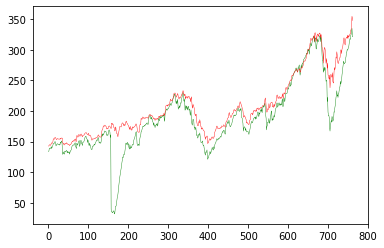

In [497]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./sae_prediction.png')
plt.show()

In [498]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [499]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(905.1108140003874, 30.08505964761226, 19.179140793962592)


In [446]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [447]:
print(mean_absolute_percentage_error(actual, pred))

81.3355403776663


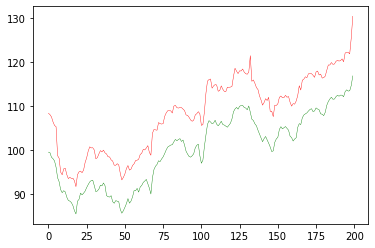

In [460]:
pred2 = pred[:200]+10
pred1 = pred[:200]
actual1 = actual[:200]
plt.plot(pred1, color='green',linewidth=0.4)
plt.plot(actual1, color='red', linewidth=0.4)

In [461]:
mse1 = mean_squared_error(actual1, pred1)
rmse1 = math.sqrt(mse)
mae1 = mean_absolute_error(actual1, pred1)
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse1,rmse1,mae1)))

mse, rmse, mae:(64.41563070081008, 128.96311720235872, 7.935655991821289)


In [312]:
pd.DataFrame(X_test[:,0,:])

0         1    2         3    4    5         6    7
0     1.584041  1.441197  0.0  0.310625  0.0  0.0  0.848771  0.0
1     1.572980  1.462330  0.0  0.353695  0.0  0.0  0.893752  0.0
2     1.566889  1.420596  0.0  0.302216  0.0  0.0  0.833330  0.0
3     1.555019  1.410912  0.0  0.315766  0.0  0.0  0.811265  0.0
4     1.547379  1.415995  0.0  0.345240  0.0  0.0  0.843641  0.0
5     1.496791  1.736927  0.0  0.747225  0.0  0.0  1.321168  0.0
6     1.504787  1.727638  0.0  0.723081  0.0  0.0  1.315192  0.0
7     1.444277  1.989735  0.0  1.046133  0.0  0.0  1.721315  0.0
8     1.446466  1.927482  0.0  0.966422  0.0  0.0  1.659344  0.0
9     1.419958  2.020334  0.0  1.074264  0.0  0.0  1.827060  0.0
10    1.401588  2.049271  0.0  1.096515  0.0  0.0  1.923656  0.0
11    1.380389  2.103017  0.0  1.146413  0.0  0.0  2.056929  0.0
12    1.376881  2.087362  0.0  1.108886  0.0  0.0  2.081991  0.0
13    1.369487  2.086043  0.0  1.081100  0.0  0.0  2.108126  0.0
14    1.369227  2.060988  0.0  1.026532  0.0  0.0  2.083204  0.0
15    1.368483  2.037480  0.0  0.981556  0.0  0.0  2.057936  0.0
16    1.379402  1.929861  0.0  0.830698  0.0  0.0  1.896611  0.0
17    1.377501  1.883161  0.0  0.777947  0.0  0.0  1.831438  0.0
18    1.380086  1.873710  0.0  0.759480  0.0  0.0  1.816987  0.0
19    1.380519  1.878583  0.0  0.758136  0.0  0.0  1.826351  0.0
20    1.381694  1.908803  0.0  0.786614  0.0  0.0  1.871028  0.0
21    1.383283  1.885514  0.0  0.751140  0.0  0.0  1.838519  0.0
22    1.374557  1.959732  0.0  0.847964  0.0  0.0  1.954703  0.0
23    1.387328  1.841076  0.0  0.675227  0.0  0.0  1.778442  0.0
24    1.425678  1.469545  0.0  0.157787  0.0  0.0  1.219062  0.0
25    1.427350  1.487990  0.0  0.192974  0.0  0.0  1.237250  0.0
26    1.440419  1.438859  0.0  0.126085  0.0  0.0  1.150263  0.0
27    1.429045  1.608251  0.0  0.377010  0.0  0.0  1.389446  0.0
28    1.472187  1.371857  0.0  0.064289  0.0  0.0  0.997516  0.0
29    1.477905  1.375300  0.0  0.082090  0.0  0.0  0.987759  0.0
...        ...       ...  ...       ...  ...  ...       ...  ...
990   3.906293  4.575688  0.0  0.535111  0.0  0.0  3.253474  0.0
991   3.893741  4.633550  0.0  0.561377  0.0  0.0  3.373960  0.0
992   3.910969  4.765405  0.0  0.641077  0.0  0.0  3.569223  0.0
993   3.921903  4.767962  0.0  0.564084  0.0  0.0  3.590175  0.0
994   3.913364  4.837822  0.0  0.579074  0.0  0.0  3.732565  0.0
995   3.911105  4.857074  0.0  0.513386  0.0  0.0  3.801480  0.0
996   3.917357  4.863672  0.0  0.421082  0.0  0.0  3.844047  0.0
997   3.966837  4.767782  0.0  0.257325  0.0  0.0  3.651412  0.0
998   3.950704  4.738622  0.0  0.225713  0.0  0.0  3.633248  0.0
999   3.932509  4.709487  0.0  0.197932  0.0  0.0  3.616682  0.0
1000  3.949082  4.677701  0.0  0.162481  0.0  0.0  3.544517  0.0
1001  3.990679  4.845674  0.0  0.300364  0.0  0.0  3.747370  0.0
1002  4.033797  4.836694  0.0  0.255986  0.0  0.0  3.682264  0.0
1003  4.036376  4.971557  0.0  0.380093  0.0  0.0  3.887035  0.0
1004  4.065195  4.927209  0.0  0.297812  0.0  0.0  3.791567  0.0
1005  4.060304  4.950714  0.0  0.311898  0.0  0.0  3.838730  0.0
1006  4.146813  4.865683  0.0  0.188622  0.0  0.0  3.592661  0.0
1007  4.127492  4.855024  0.0  0.186556  0.0  0.0  3.602710  0.0
1008  4.158467  4.892203  0.0  0.210308  0.0  0.0  3.616862  0.0
1009  4.182454  4.881564  0.0  0.197018  0.0  0.0  3.564822  0.0
1010  4.169367  5.008451  0.0  0.344599  0.0  0.0  3.768292  0.0
1011  4.186594  5.079067  0.0  0.416428  0.0  0.0  3.848053  0.0
1012  4.210472  5.097899  0.0  0.403229  0.0  0.0  3.853344  0.0
1013  4.237052  5.027107  0.0  0.309298  0.0  0.0  3.714988  0.0
1014  4.234227  5.164953  0.0  0.437656  0.0  0.0  3.932081  0.0
1015  4.250554  5.190113  0.0  0.419715  0.0  0.0  3.963347  0.0
1016  4.276151  5.229457  0.0  0.365019  0.0  0.0  4.023520  0.0
1017  4.358689  5.335567  0.0  0.365313  0.0  0.0  4.101802  0.0
1018  4.433993  5.078612  0.0  0.079414  0.0  0.0  3.608810  0.0
1019  4.423742  5.105363  0.0  0.105116  0.0  0.